In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Gargi\OneDrive\Desktop\data science\MACHINE LEARNING\Data\Crop_recommendation.csv")
df.head()
df.shape

(2200, 8)

In [3]:
label=df.groupby("label")

label.get_group("rice")
# ka matlab hai: "rice" naam ke group ko extract karo.

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [4]:
label[["humidity"]].mean()

,humidity
label,
apple,92.333383
banana,80.358123
blackgram,65.118426
chickpea,16.860439
coconut,94.844272
coffee,58.869846
cotton,79.843474
grapes,81.875228
jute,79.639864


In [5]:
label["humidity"]

In [6]:
labels=list(label.mean().index)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [7]:
nitrogen=list(label[["N"]].mean().values.ravel())
nitrogen

[20.8,
 100.23,
 40.02,
 40.09,
 21.98,
 101.2,
 117.77,
 23.18,
 78.4,
 20.75,
 18.77,
 77.76,
 20.07,
 21.44,
 20.99,
 100.32,
 19.58,
 49.88,
 20.73,
 18.87,
 79.89,
 99.42]

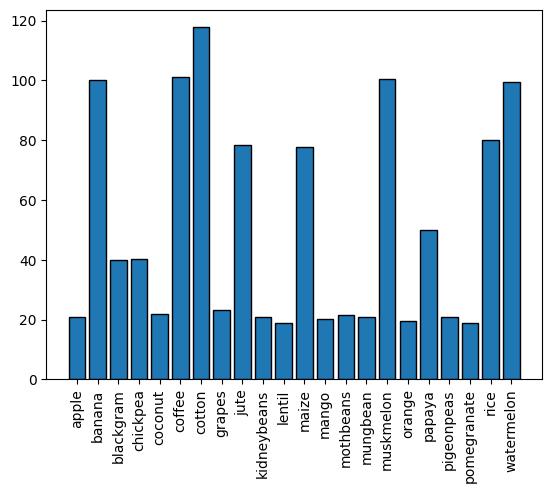

In [8]:
plt.bar(x=labels,height=nitrogen,ec="k")
plt.xticks(rotation=90)
plt.show()

In [9]:
x=df.drop("label",axis=1)

In [10]:
#standard scaler to normalize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_transformed=sc.fit_transform(x)
x_transformed.shape
#mean ko 0 kr deta h or standard deviation ko 1 kr deta h

(2200, 7)

In [11]:
desc=pd.DataFrame(x_transformed).describe()
desc.head()

,0,1,2,3,4,5,6
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01


In [12]:
df.describe()
#yeh sabka stastical analysis krke deta h
#yeh perceltile hote h kisi value ka kitta percent data ussey neeche h

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
desc_formatted=desc.applymap(lambda x:f"{int(x):d}")
desc_formatted.head()
#Pandas ka method hai — poore DataFrame ke har cell pe function apply karta hai.
#Yeh sirf DataFrame pe lagta hai (Series pe nahi).

C:\Users\Gargi\AppData\Local\Temp\ipykernel_8804\4280760494.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formatted=desc.applymap(lambda x:f"{int(x):d}")


,0,1,2,3,4,5,6
count,2200,2200,2200,2200,2200,2200,2200
mean,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1
min,-1,-1,0,-3,-2,-3,-1
25%,0,0,0,0,0,0,0


In [14]:
from sklearn.cluster import KMeans
Kmeans=KMeans()
#k bydeafault 8 leke chalta h prr hum change kr sakte h
#Kmeans=KMeans(n_clustrs=8)
Kmeans.fit(x_transformed)

c:\Users\Gargi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [15]:
label=Kmeans.labels_
#Ye fitted model ke andar se har data point ke liye cluster label deta hai.
print(label)
label.shape

[5 5 5 ... 5 7 7]


(2200,)

In [16]:
df["cluster_8"]=label

In [17]:
df["cluster_8"].value_counts()

cluster_8
6    429
7    356
5    311
0    286
4    220
1    200
3    200
2    198
Name: count, dtype: int64

In [18]:
df[df["label"]=="rice"]["cluster_8"].value_counts()

cluster_8
5    100
Name: count, dtype: int64

In [19]:
df[df["cluster_8"]==1]["label"].value_counts()
#konse cluster me kya jara h hum jiti baar code chalayenge utti baar alag milega

label
grapes    100
apple     100
Name: count, dtype: int64

In [20]:
#ab hum model evaluation krenge
#Silhouette Score me — jo clustering ka quality check hota hai
#yeh batata h ki cluster kitne ache se cluster bana h
# range -1 to 1
# -1:custer proper nhi bna h
# 1:mstt bna h
from sklearn.metrics import silhouette_score
silhouette_score(x_transformed,label)

0.3265725788326684

In [21]:
Kmeans.inertia_

4842.083075442202

In [22]:
WCSS={}
for i in range(5,51):
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(x_transformed)
    WCSS[i]=Kmeans.inertia_

c:\Users\Gargi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gargi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gargi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gargi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

In [23]:
WCSS

{5: 6856.218151036017,
 6: 6045.27685136117,
 7: 5248.625716446021,
 8: 4842.083075442202,
 9: 4472.479144098599,
 10: 4115.532756294272,
 11: 3845.098564899547,
 12: 3651.8625985239532,
 13: 3399.143191487113,
 14: 3162.736908514577,
 15: 3009.0989874889456,
 16: 2896.451498579288,
 17: 2787.0596521114962,
 18: 2624.5741121862616,
 19: 2514.039862747955,
 20: 2422.206806762121,
 21: 2338.4936049399075,
 22: 2192.358322534882,
 23: 2116.700511412758,
 24: 2049.7656063848544,
 25: 2000.6624595133453,
 26: 1932.4597739412095,
 27: 1901.115223031672,
 28: 1849.5271290462715,
 29: 1798.5871462691512,
 30: 1725.0971141971568,
 31: 1716.2952011247692,
 32: 1651.8142681470292,
 33: 1604.4106076565424,
 34: 1573.63091385362,
 35: 1546.541723237837,
 36: 1519.6212452726982,
 37: 1495.481125629408,
 38: 1457.0839702833043,
 39: 1424.2928485333764,
 40: 1417.5250098498047,
 41: 1394.5168949877934,
 42: 1368.336398408031,
 43: 1347.7996836972206,
 44: 1312.9268446549313,
 45: 1309.420816079366,
 4

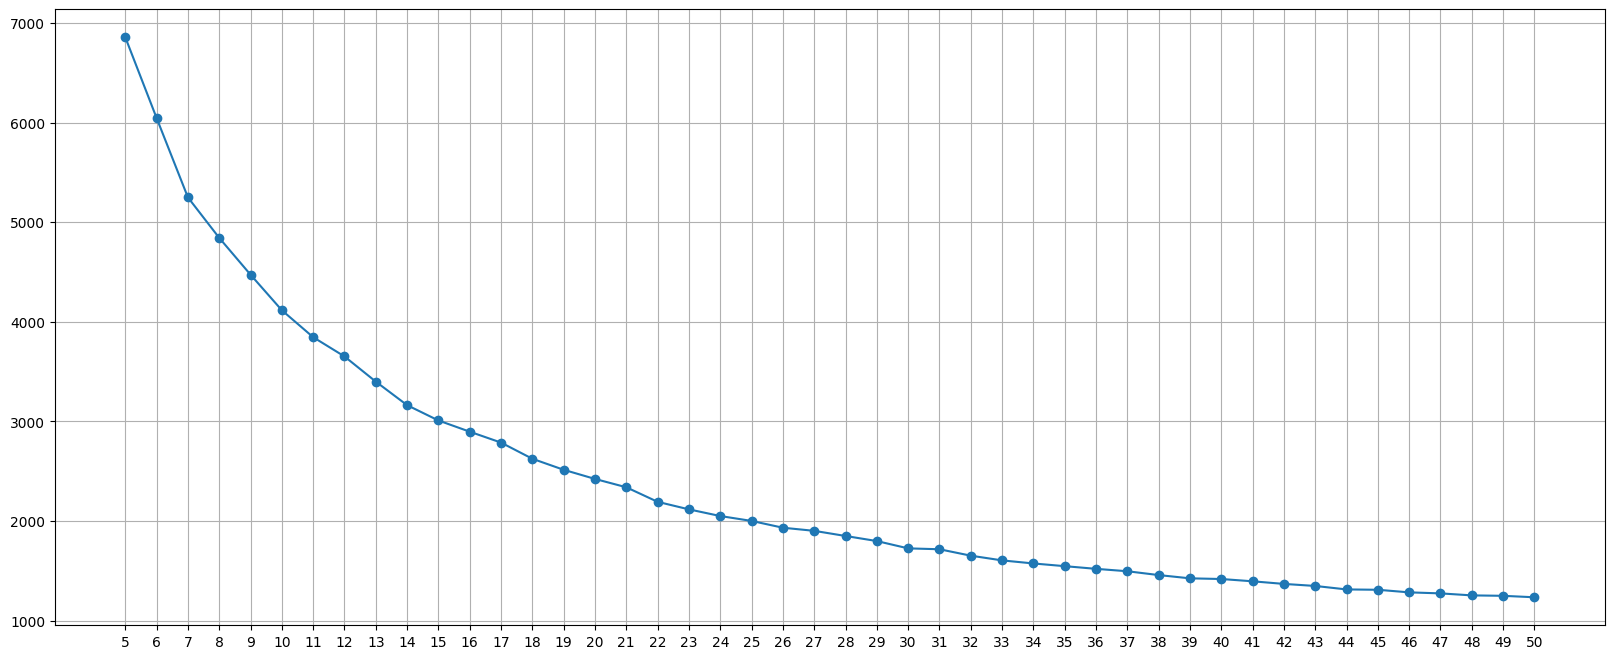

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(WCSS.keys(),WCSS.values(),marker='o')
#add a line
plt.xticks(list(WCSS.keys()))
plt.grid(True)
plt.show()

In [25]:
import joblib
joblib.dump(Kmeans,"crop_reco_kmeans.lb")

['crop_reco_kmeans.lb']

In [26]:
joblib.dump(sc,"scaler.lb")

['scaler.lb']

In [27]:
joblib.dump(df,"crop_reco_df.lb")

['crop_reco_df.lb']